In [11]:
from qutip import *
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import csv
import os
cwd = os.getcwd()
%matplotlib inline
pylab.rcParams['figure.figsize'] = (12, 8)

def mean_photons_calc(probabilities):
    photons = np.zeros(probabilities.shape[1])
    for i in range(photons.shape[0]):
        for j in range(probabilities.shape[0]):
            photons[i] = photons[i] + j * probabilities[j, i]
    return photons

def times_qload(folder_path):
    times_path = folder_path + '/times'
    times = qload(times_path)
    times = times / (2 * np.pi * 1000)
    return times

class Parameters:
    def __init__(self, wc, wq, eps, g, chi, kappa, gamma, t_levels, c_levels):
        self.wc = wc
        self.wq = wq
        self.eps = eps
        self.g = g
        self.chi = chi
        self.gamma = gamma
        self.kappa = kappa
        self.t_levels = t_levels
        self.c_levels = c_levels

    def copy(self):
        params = Parameters(self.wc, self.wq, self.eps, self.g, self.chi, self.kappa, self.gamma, self.t_levels, self.c_levels)
        return params


class Results:
    def __init__(self, params=np.array([]), wd_points=np.array([]),
                 transmissions=np.array([]), edge_occupations_c=np.array([]), edge_occupations_t=np.array([])):
        self.params = params
        self.wd_points = wd_points
        self.transmissions = transmissions
        self.edge_occupations_c = edge_occupations_c
        self.edge_occupations_t = edge_occupations_t
        self.abs_transmissions = np.absolute(self.transmissions)
        self.size = self.wd_points.size

    def concatenate(self, results):
        combined_params = np.concatenate([self.params, results.params])
        combined_wd_points = np.concatenate([self.wd_points, results.wd_points])
        combined_transmissions = np.concatenate([self.transmissions, results.transmissions])
        combined_edge_occupations_c = np.concatenate([self.edge_occupations_c, results.edge_occupations_c])
        combined_edge_occupations_t = np.concatenate([self.edge_occupations_t, results.edge_occupations_t])
        sort_indices = np.argsort(combined_wd_points)
        combined_params = combined_params[sort_indices]
        combined_wd_points = combined_wd_points[sort_indices]
        combined_transmissions = combined_transmissions[sort_indices]
        combined_edge_occupations_c = combined_edge_occupations_c[sort_indices]
        combined_edge_occupations_t = combined_edge_occupations_t[sort_indices]
        combined_results = Results(combined_params, combined_wd_points,
                                   combined_transmissions, combined_edge_occupations_c, combined_edge_occupations_t)
        return combined_results

    def delete(self, indices):
        reduced_params = np.delete(self.params, indices)
        reduced_wd_points = np.delete(self.wd_points, indices)
        reduced_transmissions = np.delete(self.transmissions, indices)
        reduced_edge_occupations_c = np.delete(self.edge_occupations_c, indices)
        reduced_edge_occupations_t = np.delete(self.edge_occupations_t, indices)
        reduced_results = Results(reduced_params, reduced_wd_points,
                                  reduced_transmissions, reduced_edge_occupations_c, reduced_edge_occupations_t)
        params_change = (reduced_params == self.params)
        wd_points_change = (reduced_wd_points == self.wd_points)
        transmissions_change = (reduced_transmissions == self.transmissions)
        edge_occupations_c_change = (reduced_edge_occupations_c == self.edge_occupations_c)
        edge_occupations_t_change = (reduced_edge_occupations_t == self.edge_occupations_t)
        print np.all([params_change, wd_points_change, transmissions_change, edge_occupations_c_change, edge_occupations_t_change])
        return reduced_results

    def queue(self):
        queue = Queue(self.params, self.wd_points)
        return queue

Loaded dict object.


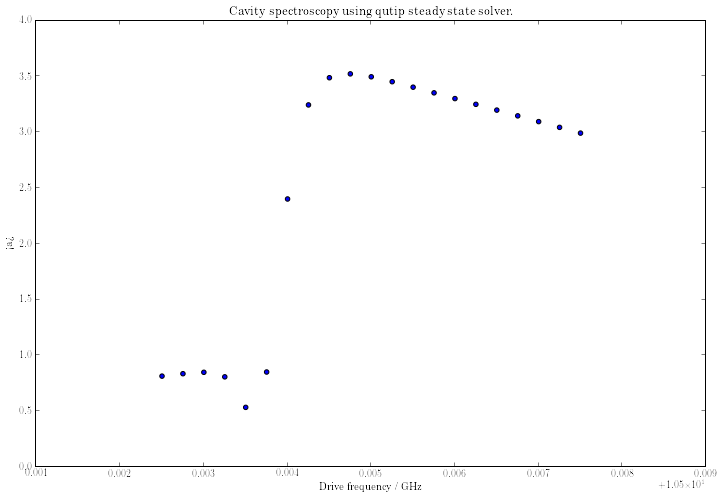

In [12]:
pylab.rcParams['figure.figsize'] = (12, 8)
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
spectroscopy_path = cwd + '/readout_spectroscopy/spectroscopy'
multi_results = qload(spectroscopy_path)
results = multi_results[0.008]
plt.scatter(results.wd_points, results.abs_transmissions)
plt.title('Cavity spectroscopy using qutip steady state solver.')
plt.xlabel('Drive frequency / GHz')
plt.ylabel('<a>')

Loaded dict object.
Loaded dict object.
Loaded ndarray object.


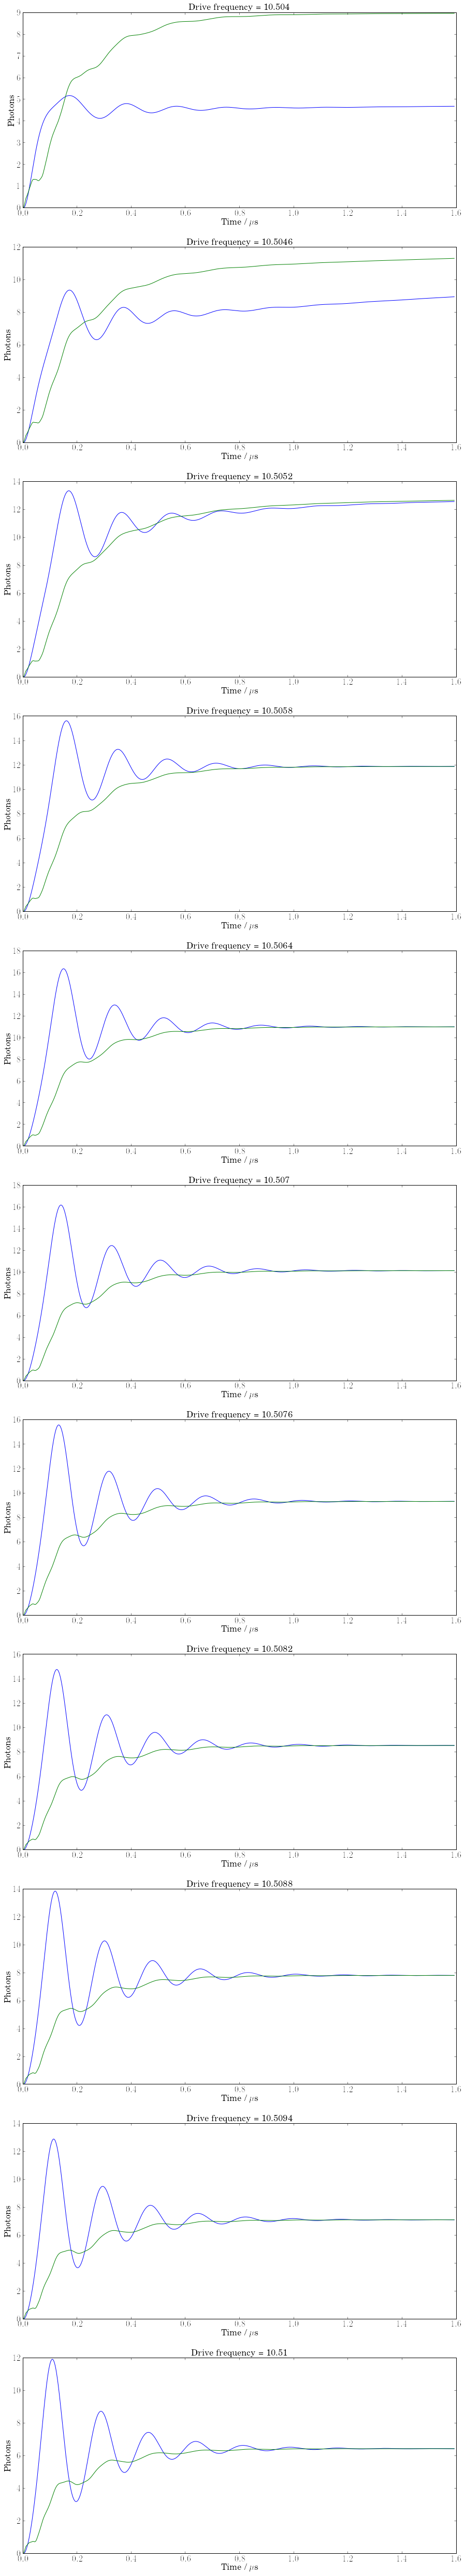

In [13]:
master_up_path = cwd + '/master/1/master_readout_8MHz_up/2017-03-08--20-50-33'
multi_results_up = qload(master_up_path + '/expectations')
master_down_path = cwd + '/master/1/master_readout_8MHz_down/2017-03-08--20-44-30'
multi_results_down = qload(master_down_path + '/expectations')
times = times_qload(master_down_path)
keys = sorted(multi_results_down.keys())
number_of_drives = len(multi_results_down)
fontsize = 17
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
pylab.rcParams['figure.figsize'] = (15, 8 * number_of_drives)
for idx, key in enumerate(keys):
    plt.subplot(number_of_drives, 1, idx + 1)
    mean_photons_down = mean_photons_calc(np.array(multi_results_down[key]))
    mean_photons_up = mean_photons_calc(np.array(multi_results_up[key]))
    plt.plot(times, mean_photons_down)
    plt.plot(times, mean_photons_up)
    plt.xlabel(r'Time / $\mu$s', fontsize=fontsize)
    plt.ylabel('Photons', fontsize=fontsize)
    plt.tick_params(axis='both', labelsize=fontsize)
    plt.title('Drive frequency = ' + str(key), fontsize=fontsize)


Loaded dict object.


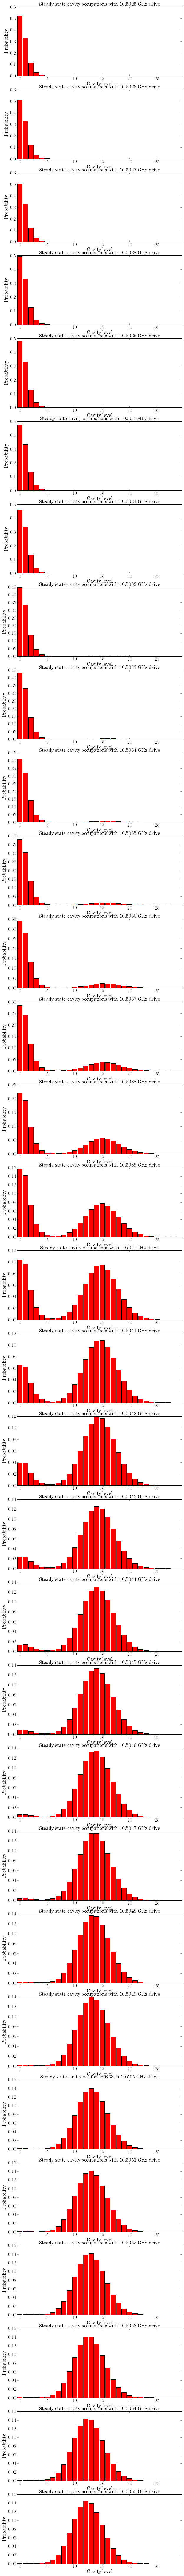

In [14]:
rho_ss_dict = qload(cwd + '/readout_steady_state/2017-03-09--15-31-28/density_matrix')

keys = sorted(rho_ss_dict.keys())
number_of_drives = len(keys)
fontsize = 17
width = 0.9
fontsize = 16
rows = number_of_drives
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
font = {'family' : 'normal',
        'size'   : 18}
plt.rc('font', **font)
pylab.rcParams['figure.figsize'] = (10, 5 * number_of_drives)
for idx, key in enumerate(keys):
    plt.subplot(rows, 1, 1 + idx)
    rho_ss = rho_ss_dict[key]
    rho_c_ss = rho_ss.ptrace(0)
    cavity_occupations_qutip = rho_c_ss.diag()
    ind = np.arange(cavity_occupations_qutip.size)
    plt.bar(ind - width / 2, cavity_occupations_qutip, width, color='r')
    plt.xlim([-0.5, cavity_occupations_qutip.size - 0.5])
    plt.title('Steady state cavity occupations with ' + str(key) + ' GHz drive', fontsize=fontsize)
    plt.xlabel('Cavity level', fontsize=fontsize)
    plt.ylabel('Probability', fontsize=fontsize)
    plt.tick_params(axis='both', labelsize=fontsize)

In [19]:
keys

[10.5025,
 10.502599999999999,
 10.502699999999999,
 10.502799999999999,
 10.5029,
 10.503,
 10.5031,
 10.5032,
 10.503299999999999,
 10.503399999999999,
 10.503499999999999,
 10.503599999999999,
 10.5037,
 10.5038,
 10.5039,
 10.504,
 10.504099999999999,
 10.504199999999999,
 10.504299999999999,
 10.5044,
 10.5045,
 10.5046,
 10.5047,
 10.504799999999999,
 10.504899999999999,
 10.504999999999999,
 10.505099999999999,
 10.5052,
 10.5053,
 10.5054,
 10.5055]

In [25]:
master_down_path = cwd + '/master/2/master_readout_8MHz_down/2017-03-09--20-53-34'
multi_results_down = qload(master_down_path + '/expectations')
master_up_path = cwd + '/master/2/master_readout_8MHz_up/2017-03-09--21-06-54'
multi_results_up = qload(master_up_path + '/expectations')
rho_ss_dict = qload(cwd + '/readout_steady_state/2017-03-09--15-31-28/density_matrix')

spectroscopy_path = cwd + '/readout_spectroscopy/spectroscopy'
multi_results_spec = qload(spectroscopy_path)
spec_results = multi_results_spec[0.008]

times = times_qload(master_down_path)
keys = sorted(multi_results_down.keys())
number_of_drives = len(multi_results_down)
fontsize = 17
width = 0.9
fontsize = 16
rows = number_of_drives
columns = 3
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
font = {'family' : 'normal',
        'size'   : 18}
plt.rc('font', **font)
pylab.rcParams['figure.figsize'] = (25, 15 * number_of_drives)
for idx, key in enumerate(keys):
    plt.subplot(columns*rows, columns, 1 + columns*idx)
    plt.scatter(spec_results.wd_points, spec_results.abs_transmissions)
    plt.title('Drive frequency = ' + str(key) + ' GHz', fontsize=fontsize)
    plt.xlabel('Drive frequency / GHz', fontsize=fontsize)
    plt.ylabel(r'$\langle$ a $\rangle$', fontsize=fontsize)
    plt.xlim([10.502, 10.506])
    plt.axvline(x=key, ymin=0.0, ymax = 3.0, linewidth=2, color='k')
    plt.tick_params(axis='both', labelsize=fontsize)
    
    plt.subplot(rows*columns, columns, columns*idx + 2)
    mean_photons_down = mean_photons_calc(np.array(multi_results_down[key]))
    mean_photons_up = mean_photons_calc(np.array(multi_results_up[key]))
    plt.plot(times, mean_photons_down)
    plt.plot(times, mean_photons_up)
    legend = [r'$| g \rangle$', r'$| e \rangle$']
    plt.legend(legend, loc=4)
    plt.xlabel(r'Time / $\mu$s', fontsize=fontsize)
    plt.ylabel(r'Photons $\langle$ n $\rangle$', fontsize=fontsize)
    plt.tick_params(axis='both', labelsize=fontsize)
    plt.title('Transient response of the cavity depending on initial transmon state', fontsize=fontsize)
    
    plt.subplot(rows*columns, columns, 3 + columns*idx)
    rho_ss = rho_ss_dict[key]
    rho_c_ss = rho_ss.ptrace(0)
    cavity_occupations_qutip = rho_c_ss.diag()
    ind = np.arange(cavity_occupations_qutip.size)
    plt.bar(ind - width / 2, cavity_occupations_qutip, width, color='r')
    plt.xlim([-0.5, cavity_occupations_qutip.size - 0.5])
    plt.title('Steady state cavity occupations', fontsize=fontsize)
    plt.xlabel('Cavity level', fontsize=fontsize)
    plt.ylabel('Probability', fontsize=fontsize)
    plt.tick_params(axis='both', labelsize=fontsize)

Loaded dict object.
Loaded dict object.
Loaded dict object.
Loaded dict object.
Loaded ndarray object.


ValueError: width and height must each be below 32768